### Example of Gradient Descent Optimization for Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

In [2]:
sales = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/data.csv")
sales.head(5)

,Spending,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


In [3]:
sales.shape

(200, 2)

In [4]:
x = sales['Spending']
y = sales['Sales']

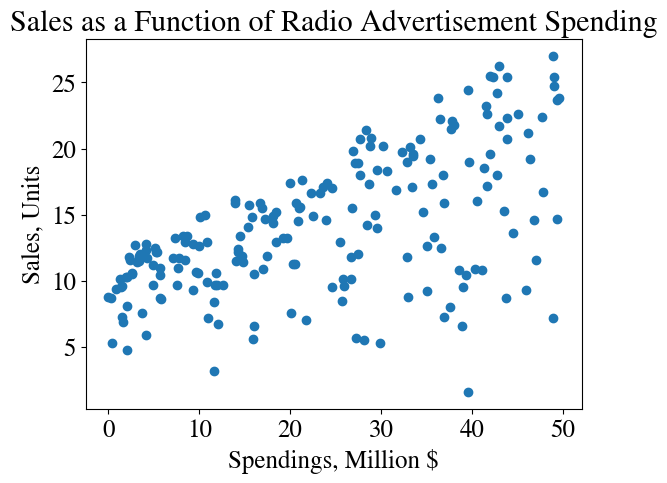

In [5]:
# Create a scatter plot
plt.scatter(x, y, color = '#1f77b4', marker = 'o')
plt.xlabel("Spendings, Million $")
plt.ylabel("Sales, Units")
plt.title("Sales as a Function of Radio Advertisement Spending")
plt.show()

In [6]:
def update_w_and_b(spendings, sales, w, b, alpha):

    N = len(spendings) # Number of data points
    dr_dw = 0.0 # Initialize the gradients for slope
    dr_db = 0.0 # Initialize the gradients for intercept
    
    # Compute the partial derivative of the loss function with respect to slope and intercept
    for i in range(N):
        dr_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dr_db += -2 * (sales[i] - (w * spendings[i] + b))

    # Update slope and intercept
    w = w - (dr_dw/float(N)) * alpha
    b = b - (dr_db/float(N)) * alpha

    # Return the updated values of slope and intercept
    return w, b

In [7]:
def loss(spendings, sales, w, b):
    
    N = len(spendings) # Number of data points
    total_error = 0.0 # Initialize the total error

    # Compute the squared difference
    for i in range(N):
        total_error += (sales[i] - (w * spendings[i] + b)) ** 2

    # Return the mean squared error
    return total_error / N

In [8]:
def train(x, y, w, b, alpha, epochs):
    
    # Update the slope and intercept using gradient descent
    for e in range(epochs):
        w, b = update_w_and_b(x, y, w, b, alpha)

        # Print the current epoch, loss, slope and intercept in every 5000 epochs
        if e % 5000 == 0:
            print("epoch:", str(e))
            print("loss:", str(loss(x, y, w, b)))
            print("Slope:", w)
            print("Intercept:", b)
            print()

    # Return the final updated values of slope and intercept
    return w, b

In [9]:
# Call the function
slope, intercept = train(x, y, 100.0, 100.0, 0.001, 15000)

print("Final Updated Slope Value:", slope)
print("Final Updated Intercept Value:", intercept)

epoch: 0
loss: 2186770.2435210436
Slope: -56.019396099999994
Intercept: 95.175245

epoch: 5000
loss: 25.02305287162052
Slope: 0.0524822251614237
Intercept: 14.21397586428214

epoch: 10000
loss: 18.11415198703264
Slope: 0.1940912163695437
Intercept: 9.586293445216882

Final Updated Slope Value: 0.2020246428253321
Final Updated Intercept Value: 9.327034638137023


In [10]:
def predict(x, w, b):

    # Compute the prediction using the linear equation
    prediction_y = w * x + b
    
    # Return the predicted value
    return prediction_y

In [11]:
x_new = 23.0 # Set a new spending value for prediction
y_new = predict(x_new, slope, intercept) # Predict sales value for the new spending value

In [12]:
print("Learned Model")
print("Spending:", x_new)
print("Predicted Sales:", y_new)

Learned Model
Spending: 23.0
Predicted Sales: 13.973601423119662


In [13]:
x = np.array(x).reshape(-1, 1) # Reshape the array to a 2D array
linreg = LinearRegression() # Initialize the Linear Regression
linreg.fit(x, y) # Fit the model

LinearRegression()

In [14]:
x_new = 23.0 # Set a new spending value for prediction
y_new = linreg.predict(np.array(x_new).reshape(-1, 1)) # Predict sales value for the new spending value

In [15]:
print("Linear Regression Model from scikit-learn")
print("Spending:", x_new)
print("Predicted Sales:", y_new)

Linear Regression Model from scikit-learn
Spending: 23.0
Predicted Sales: [13.96904111]


In [16]:
def train(x, y, w, b, alpha, epochs):
    
    image_counter = 2
    w_array = np.array([]) # Array to store slope values for each epoch
    b_array = np.array([]) # Array to store intercept values for each epoch

    # Update the slope and intercept using gradient descent
    for e in range(epochs):
        w, b = update_w_and_b(x, y, w, b, alpha)
        
        # Append the updated values
        w_array = np.append(w_array, [w])
        b_array = np.append(b_array, [b])
        
        # Print the current epoch, loss, slope, intercept and scatter plot in every 5000 epochs
        if e % 5000 == 0:
            print("epoch:", str(e))
            print("loss:", str(loss(x, y, w, b)))
            print("Slope:", w)
            print("Intercept:", b)
            
            # Create a scatter plot
            plt.figure(image_counter)
            axes = plt.gca()
            axes.set_xlim([0, 50])
            axes.set_ylim([0, 30])
            plt.scatter(x, y)
            X_plot = np.linspace(0, 50, 50)
            plt.plot(X_plot, X_plot * w + b)
            plt.show()

            # Increment the figure counter for the next plot
            image_counter += 1
    
    # Return the arrays of slope and intercept values over the training epochs
    return w_array, b_array

epoch: 0
loss: [92.32078295]
Slope: [0.7412639]
Intercept: [0.028045]


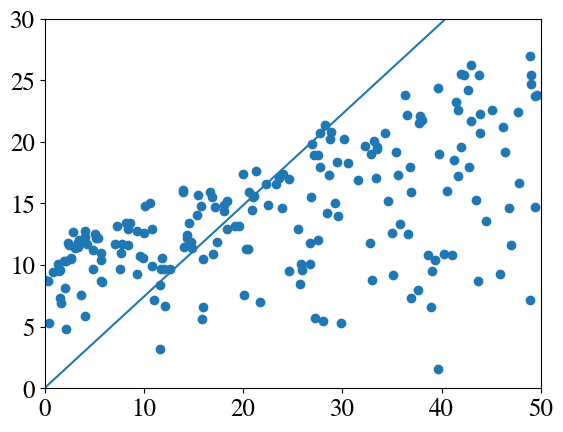

epoch: 5000
loss: [18.17054215]
Slope: [0.21842492]
Intercept: [8.79108501]


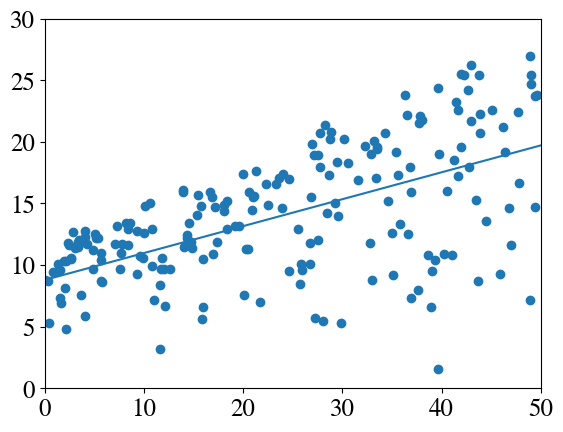

epoch: 10000
loss: [18.09264303]
Slope: [0.20338822]
Intercept: [9.28247391]


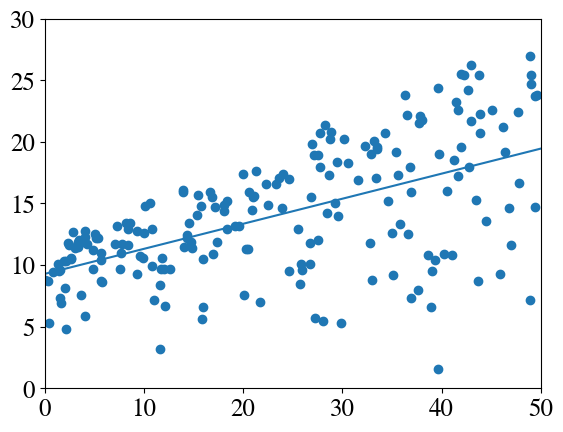

In [17]:
# Call the function
w_array, b_array = train(x, y, 0.0, 0.0, 0.001, 15000)

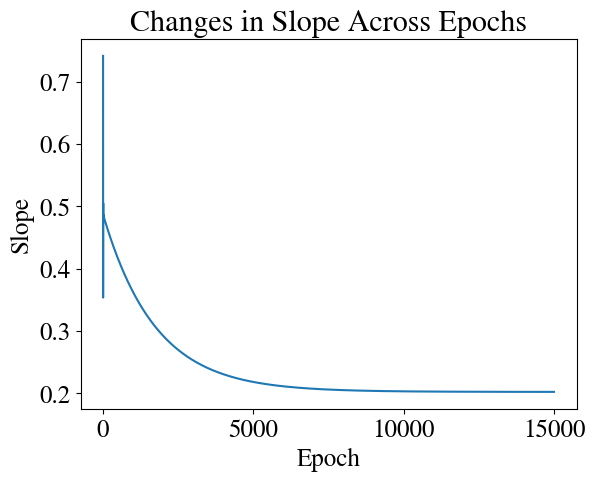

In [18]:
# Plot the changes in slope across the epochs
plt.plot(range(15000), w_array)
plt.xlabel("Epoch")
plt.ylabel("Slope")
plt.title("Changes in Slope Across Epochs")
plt.show()

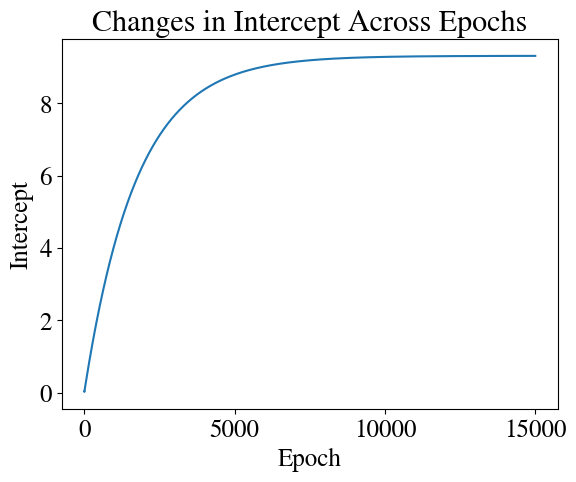

In [19]:
# Plot the changes in intercept across the epochs
plt.plot(range(15000), b_array)
plt.xlabel("Epoch")
plt.ylabel("Intercept")
plt.title("Changes in Intercept Across Epochs")
plt.show()

Stochastic Gradient Descent

In [20]:
def update_w_and_b_sgd(spendings, sales, w, b, alpha, i):

    dr_dw = 0.0 # Initialize the gradients for slope
    dr_db = 0.0 # Initialize the gradients for intercept

    # Compute the partial derivative of the loss function with respect to slope and intercept
    dr_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
    dr_db += -2 * (sales[i] - (w * spendings[i] + b))

    # Update slope and intercept
    w = w - dr_dw * alpha
    b = b - dr_db * alpha

    # Return the updated values of slope and intercept
    return w, b

In [21]:
def train_sgd(x, y, w, b, alpha, epochs):
    
    # Update the slope and intercept using stochastic gradient descent
    for e in range(epochs):
        i = e % len(x) # Select the index of the current data point
        w, b = update_w_and_b_sgd(x, y, w, b, alpha, i)

        # Print the current epoch, loss, slope and intercept in every 5000 epochs
        if e % 50000 == 0:
            print("epoch:", str(e))
            print("loss:", str(loss(x, y, w, b)))
            print("Slope:", w)
            print("Intercept:", b)
            print()
            
    # Return the final updated values of slope and intercept
    return w, b

In [22]:
x = sales['Spending']
y = sales['Sales']

In [23]:
# Call the function
slope, intercept = train_sgd(x, y, 0.0, 0.0, 0.0001, 150000)

print("Final Updated Slope Value:", slope)
print("Final Updated Intercept Value:", intercept)

epoch: 0
loss: 121.00925354777199
Slope: 0.167076
Intercept: 0.00442

epoch: 50000
loss: 24.85877875461303
Slope: 0.31139648272285125
Intercept: 8.819083592646928

epoch: 100000
loss: 24.885830498941615
Slope: 0.29722174998068346
Intercept: 9.304617571503286

Final Updated Slope Value: 0.2798895817915282
Final Updated Intercept Value: 9.330954710351602
